[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 4. 0.]
 [0. 0. 0. ... 0. 4. 0.]
 [0. 0. 0. ... 0. 4. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


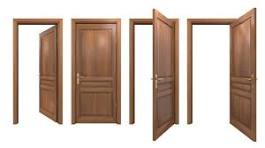

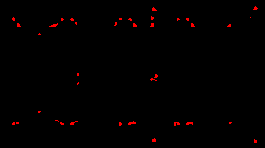

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def harris_corner_detection(image, threshold=0.01):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)

    # Calculate gradients using Sobel operator
    dx = cv2.Sobel(gray, cv2.CV_32F, 1, 0)
    dy = cv2.Sobel(gray, cv2.CV_32F, 0, 1)
    print(dx)
    print(dy)
    # Calculate products of gradients
    dx2 = dx * dx
    dy2 = dy * dy
    dxy = dx * dy

    # Apply Gaussian blur to the products of gradients
    window_size = 3
    dx2 = cv2.GaussianBlur(dx2, (window_size, window_size), 0)
    dy2 = cv2.GaussianBlur(dy2, (window_size, window_size), 0)
    dxy = cv2.GaussianBlur(dxy, (window_size, window_size), 0)

    # Harris Corner Response
    det = dx2 * dy2 - dxy * dxy
    trace = dx2 + dy2
    harris_response = det - 0.04 * trace ** 2

    # Thresholding to find corners
    corners = np.zeros_like(image)
    corners[harris_response > threshold * harris_response.max()] = [0, 0, 255]  # Mark corners in red

    return corners

# Read image
image = cv2.imread('/content/download.jfif')

# Detect corners
corners = harris_corner_detection(image)

# Display results
cv2_imshow(image)
cv2_imshow(corners)
cv2.waitKey(0)
cv2.destroyAllWindows()